**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />

# 02: Importar

## Cómo importar los datos?

### Introducción

A continuación se presentan diferentes formas y funciones para importar y exportar datos. Labor inicial que se requiere para iniciar la construcción del modelo.

Inicialmente se deben importar todas las librerías que se requieren en los diferentes procedimientos. Existen diferentes librerias para importar archivos con formatos diferentes, aca se presentan algunas de las mas utilizadas y conocidas. 

Para importar mapas en formato tiff uno de los paquetes mas utilizados es gdal, tambien existen otros como rasterio, entre otros.

Para exportar archivos en formato xlsx se requiere el paquete openpyxl.

Para trabajar con archivos tipo bin, se requiere  el paquete pickle.

Y para trabajar con archivos tipo .nc se requiere el paquete netCDF4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from osgeo import gdal
import pickle
import openpyxl
import netCDF4 as nc

In [11]:
xlsx= pd.read_excel('https://github.com/edieraristizabal/MachineLearning/blob/master/data/Torrencialidad_DB_vf.xlsx', sheet_name='Hoja2')
print(xlsx.shape)
xlsx.tail(5)

ValueError: ignored

In [ ]:
data=(xlsx.iloc[:,4])
print(data.shape)
data.head(5)

(73,)


0     4.9820
1     6.5693
2    31.8530
3    26.4590
4    10.4070
Name: Stream Lenght, dtype: float64

In [ ]:
writer = xlsx.to_excel('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\DF_prueba.xlsx')

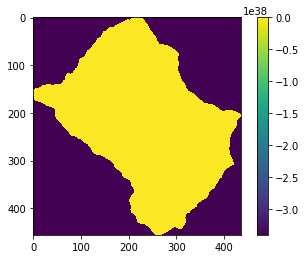

In [ ]:
driver = gdal.GetDriverByName('GTiff')
file = gdal.Open('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\dtm_Arenosa')
raster = file.GetRasterBand(1)
dem = raster.ReadAsArray()
plt.imshow(dem)
plt.colorbar();

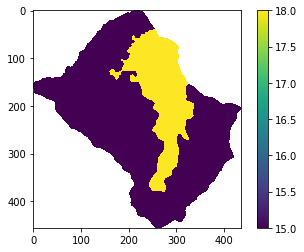

In [ ]:
geologia=np.loadtxt('G:/My Drive/ANALISIS ESPACIAL APLICADO/datos/raster/gamma.asc', skiprows=6)
geologia=np.where(geologia==-9999.,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar();

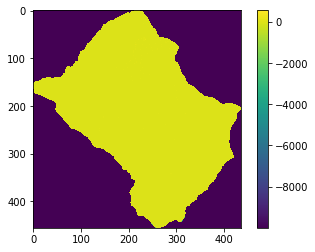

In [ ]:
FS_hazard  = np.genfromtxt('G:/My Drive/PAPERS/ELABORACION/SHIA_George/resultados/FS_AMEACA.txt')
plt.imshow(FS_hazard)
plt.colorbar();

In [ ]:
f=open('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\prueba.txt','w')
f.write('prueba')
f.close()

In [ ]:
file=open('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\prueba_binario.bin','wb')
pickle.dump(data, file)
file.close()

In [ ]:
file= open('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\prueba_binario.bin', 'rb')
vector=pickle.load(file)
file.close()
vector.head(5)

0     4.9820
1     6.5693
2    31.8530
3    26.4590
4    10.4070
Name: Stream Lenght, dtype: float64

In [ ]:
CHIRPS = nc.Dataset('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\chirps-v2.0.monthly.nc')
VARS   = [x for x in CHIRPS.variables]
print(VARS)

OSError: [Errno -101] NetCDF: HDF error: b'G:\\My Drive\\ANALISIS ESPACIAL APLICADO\\datos\\chirps-v2.0.monthly.nc'

In [ ]:
file_out = driver.Create( 'G:/My Drive/ANALISIS ESPACIAL APLICADO/datos/raster/dem_out.tif', file.RasterXSize , file.RasterYSize , 1)
file_out.GetRasterBand(1).WriteArray(dem)

# spatial ref system
proj = file.GetProjection()
georef = file.GetGeoTransform()
file_out.SetProjection(proj)
file_out.SetGeoTransform(georef)
file_out.GetRasterBand(1).SetNoDataValue(-9999)
file_out.FlushCache()

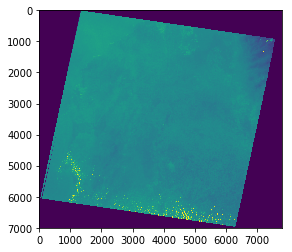

In [ ]:
composite = gdal.Open('G:/My Drive/SENSORES REMOTOS/TALLERES/Taller 2_LANDSAT_ArcGIS/Imagen/barranquilla/Composite_LE70090532003066EDC00.tif')
raster = composite.GetRasterBand(1)
B1= raster.ReadAsArray()
plt.imshow(B1);


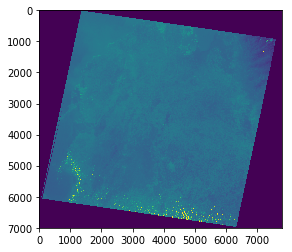

In [ ]:
raster = composite.GetRasterBand(2)
B2= raster.ReadAsArray()
plt.imshow(B2);

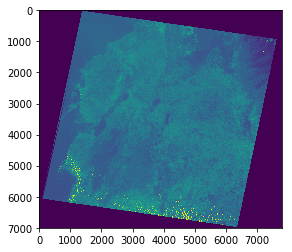

In [ ]:
raster = composite.GetRasterBand(3)
B3= raster.ReadAsArray()
plt.imshow(B3);

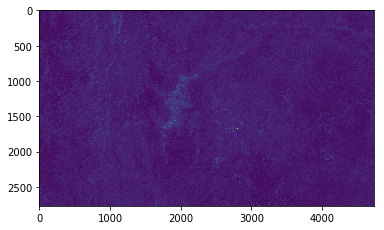

In [ ]:
file = gdal.Open('G:/My Drive/ANALISIS ESPACIAL APLICADO/datos/VdeA/2014.B3.tif')
raster = file.GetRasterBand(1)
B1= raster.ReadAsArray()
plt.imshow(B1);

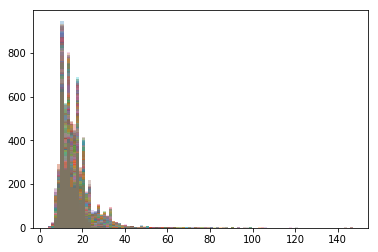

In [ ]:
plt.hist(B1, bins=100, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled');

![](images/numpy-intro/array_1.png)